## <center> $\textbf{Flat Price Prediction}$ 

In [246]:
# I have used the dataset("resale-flat-prices-based-on-approval-date-1990-1999.csv") 
# for the flat price prediction by considering the number of rooms 
# according to the rules of Singapore Housing and Development Board (HDB). 

# For more details: https://www.hdb.gov.sg/residential/buying-a-flat/resale/getting-started/types-of-flats
# Datasets: https://data.gov.sg/dataset/resale-flat-prices?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee

In [247]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [248]:
#reading .csv file and storing it in "dataset" dataframe
dataset=pd.read_csv("/home/ankit/Desktop/resale-flat-prices-based-on-approval-date-1990-1999.csv")

In [249]:
print(dataset)
# There are total 9 features(predictors) including both qualitative and quantitative features.

          month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
287195  1999-12      YISHUN  EXECUTIVE   611      YISHUN ST 61     10 TO 12   
287196  1999-12      YISHUN  EXECUTIVE   324       YISHUN CTRL     01 TO 03   
287197  1999-12      YISHUN  EXECUTIVE   392      YISHUN AVE 6     07 TO 09   
287198  1999-12      YISHUN  EXECUTIVE   356    YISHUN RING RD     04 TO 06   
287199  1999-12      YISHUN  EXECUTIVE   358    YISHUN RING RD     01 TO 03   

        floor_area_sqm      flat_model  lease_comme

In [250]:
print(dataset.shape)
# Total 287200 rows and 10 columns are present in this dataset.

(287200, 10)


In [251]:
dataset.flat_type.unique() # to find the unique values in flat_type column

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [252]:
n1 = len(pd.unique(dataset['flat_type']))
n1

7

In [253]:
dataset.storey_range.unique() # to find the unique values in storey_range column

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24'], dtype=object)

In [254]:
dataset.describe()
# We get the statistic about the dataset.
# On average, floor area is 93.35 sqm and resale price is 219541$ and we can also check the other details here.
# From this output, I will try to see the nature of the dataset.

floor_area_sqm  lease_commence_date   resale_price
count   287200.000000        287200.000000  287200.000000
mean        93.351439          1983.206741  219541.850313
std         27.361839             6.085734  128144.384286
min         28.000000          1967.000000    5000.000000
25%         68.000000          1979.000000  127000.000000
50%         91.000000          1984.000000  195000.000000
75%        113.000000          1987.000000  298000.000000
max        307.000000          1997.000000  900000.000000

In [255]:
#summary statistics of columns in dataframe
dataset.describe().transpose() # Rowwise summary

count           mean            std     min       25%  \
floor_area_sqm       287200.0      93.351439      27.361839    28.0      68.0   
lease_commence_date  287200.0    1983.206741       6.085734  1967.0    1979.0   
resale_price         287200.0  219541.850313  128144.384286  5000.0  127000.0   

                          50%       75%       max  
floor_area_sqm           91.0     113.0     307.0  
lease_commence_date    1984.0    1987.0    1997.0  
resale_price         195000.0  298000.0  900000.0

In [256]:
dataset.dtypes # To see the datatypes of the column data

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
dtype: object

## $\textbf{Data Preprocessing}$

In [257]:
data = dataset.to_numpy() # storing dataset as numpy array

In [258]:
#dataset['flat_type'] = dataset['flat_type'].map(lambda x: x.rstrip('ROOM'))

In [259]:
# https://www.hdb.gov.sg/residential/buying-a-flat/resale/getting-started/types-of-flats
# Converting the string type flat_type data into numerical data, so that machine learning algorithm
# will work on this numerical data.
# Used the number of bedrooms in each flat_type according to the rules of HDB(singapore) and assumed number 
# of bedrooms in "1 ROOM" flat_type is 1 as it is not mentioned on the site.
for i in range(len(data)):
    if data[i][2]=="1 ROOM":
        data[i][2]=1
    if data[i][2]=="2 ROOM":
        data[i][2]=1
    if data[i][2]=="3 ROOM":
        data[i][2]=2
    if data[i][2]=="4 ROOM":
        data[i][2]=3
    if data[i][2]=="5 ROOM":
        data[i][2]=3
    if data[i][2]=="EXECUTIVE":
        data[i][2]=3
    if data[i][2]=="MULTI GENERATION":
        data[i][2]=4    

In [260]:
# In the storey_range column, on taking the average of minimum and maximum number of storeys, so that 
# string get converted into numerical data. 
# Extracted first 2 digits and last 2 digits and have taken the average.
for i in range(len(data)):
    string=data[i][5]
    p=int(string[0])
    q=int(string[1])
    x=10*p + q
    #print(x)
    r=int(string[-1])
    s=int(string[-2])
    y=10*s+r
    #print((x+y)/2)
    avg=round((x+y)/2)
    data[i][5]=avg

In [261]:
# From numpy array i.e. "data"(list of lists) to dataframe:
dataset1 = pd.DataFrame(data, columns =['month','town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','resale_price']) 

In [262]:
dataset1

month        town flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO         1   309  ANG MO KIO AVE 1           11   
1       1990-01  ANG MO KIO         1   309  ANG MO KIO AVE 1            5   
2       1990-01  ANG MO KIO         1   309  ANG MO KIO AVE 1           11   
3       1990-01  ANG MO KIO         1   309  ANG MO KIO AVE 1            8   
4       1990-01  ANG MO KIO         2   216  ANG MO KIO AVE 1            5   
...         ...         ...       ...   ...               ...          ...   
287195  1999-12      YISHUN         3   611      YISHUN ST 61           11   
287196  1999-12      YISHUN         3   324       YISHUN CTRL            2   
287197  1999-12      YISHUN         3   392      YISHUN AVE 6            8   
287198  1999-12      YISHUN         3   356    YISHUN RING RD            5   
287199  1999-12      YISHUN         3   358    YISHUN RING RD            2   

       floor_area_sqm      flat_model lease_commence_date resale_price  
0                  31        IMPROVED                1977         9000  
1                  31        IMPROVED                1977         6000  
2                  31        IMPROVED                1977         8000  
3                  31        IMPROVED                1977         6000  
4                  73  NEW GENERATION                1976        47200  
...               ...             ...                 ...          ...  
287195            142       APARTMENT                1987       456000  
287196            142       APARTMENT                1988       408000  
287197            146      MAISONETTE                1988       469000  
287198            146      MAISONETTE                1988       440000  
287199            145      MAISONETTE                1988       484000  

[287200 rows x 10 columns]

## $\textbf{Exploratory Data Analysis}$

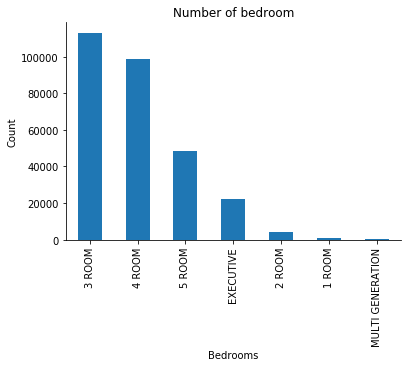

In [263]:
dataset['flat_type'].value_counts().plot(kind='bar')
plt.title('Number of bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()

In [264]:
# As we can see from the visualization 3 and 4 bedroom houses are most commonly sold.
# So, for a builder having this data , it can make a new flat with more 3 and 4 bedrooms
# to attract more buyers.

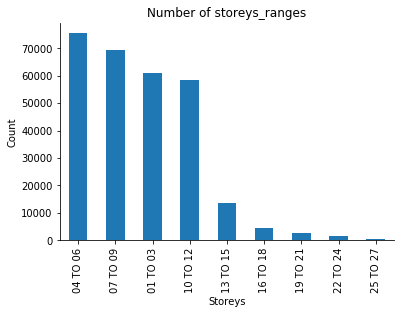

In [265]:
dataset['storey_range'].value_counts().plot(kind='bar')
plt.title('Number of storeys_ranges')
plt.xlabel('Storeys')
plt.ylabel('Count')
sns.despine()

In [266]:
# As we can see 4 to 6, 7 to 9 , 1 to 3 and 10 to 12 storey_range flats have more count.
# So, to predict resale flat prices of the flat, we should have to consider these storey range flats.

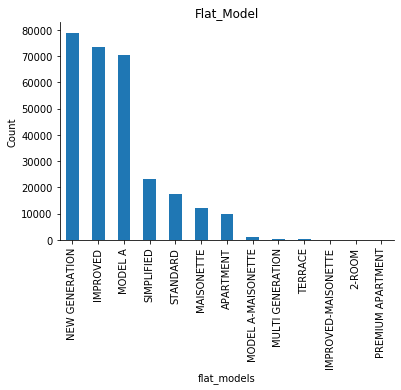

In [267]:
dataset['flat_model'].value_counts().plot(kind='bar')
plt.title('Flat_Model')
plt.xlabel('flat_models')
plt.ylabel('Count')
sns.despine()

In [268]:
# Here, "NEW GENERATION", "IMPROVED" and "MODEL A" flat models have more count compared to other flat models.
# So, while predicting flat prices, we should have to concentrate these flat models.

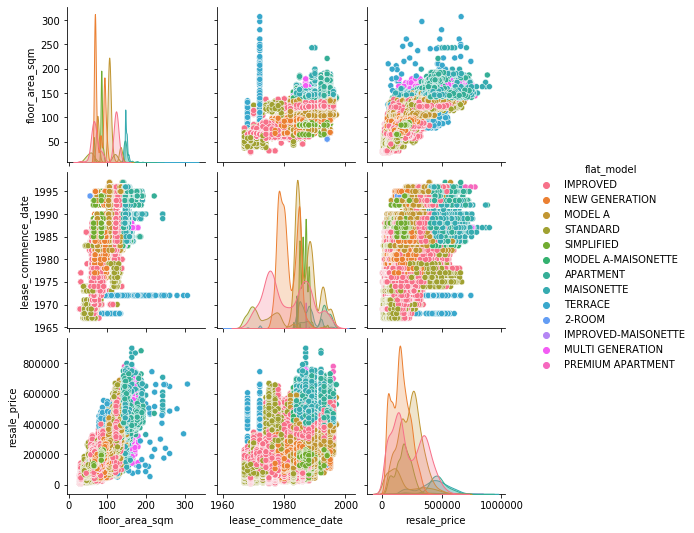

In [269]:
sns.pairplot(dataset,hue='flat_model', diag_kws={'bw': 0.2})
plt.show()

In [270]:
# As we can see, there is a spike in the scatter plot between floor_area_sqm and lease commence_date.
# For lease_commence year between 1960 and 1980, for 2-ROOM flat model, floor area is very high and this 
# 2-ROOM flat model is used between these years only.
# Similarly, APARTMENT,MODEL A-MAISONETTE and MAISONETTE flat models were used between 1980 and 2000
# lease_commence year.
# For "MODEL A" AND "STANDARD" flat models, flat area is under 150 square meters.
# There is approximate a linear relationship between resale_price and floor_area_sqm
# MODEL A and STANDARD flat models have floor_area between 100 and 200 sqm for which resale price is between 
# 200000 and 700000
# PREMIUM APARTMENT have floor_area between 0 and 150 sqm for which resale_prices are under 600000$.
# For "most" 2-ROOM and TERRACE flat models, lease_commence year is between 1980 and 1998 and 
# resale_prices are above 400000$.

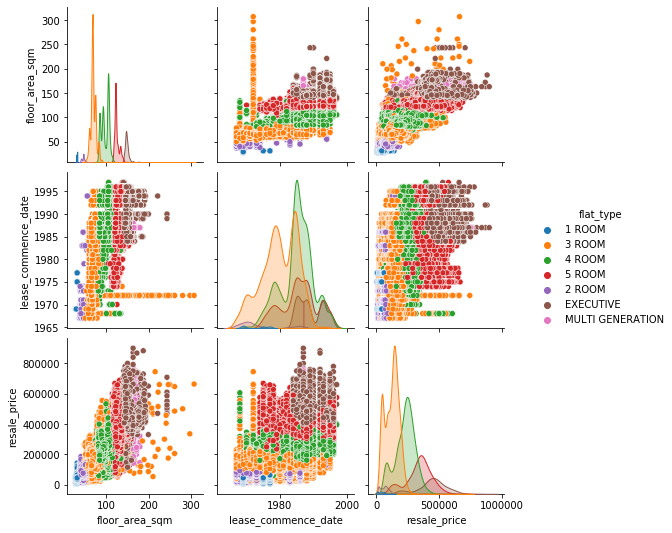

In [271]:
sns.pairplot(dataset,hue='flat_type', diag_kws={'bw': 0.2})
plt.show()

In [272]:
# There is a spike for "3-ROOM" flat_type for earlier lease_commence_year of 1980 which shows 
# total flat area in sqm is maximum in that year for "3-ROOM" flat type
# floor area for "4 ROOM" and "5 ROOM" flat_type is less than 150 sqm.
# floor area for "1 ROOM" and "2 ROOM" flat_type is less than 50 sqm.
# EXECUTIVE flat type are implemented after 1980 lease commence_year and mostly floor are is between 
# 150 and 200 sqm except 2-3 flats.
# Mostly EXECUTIVE flats have resale price more than 400000$ with floor area around 100 sqm.
# "4 ROOM" flats have resale price less than 600000$

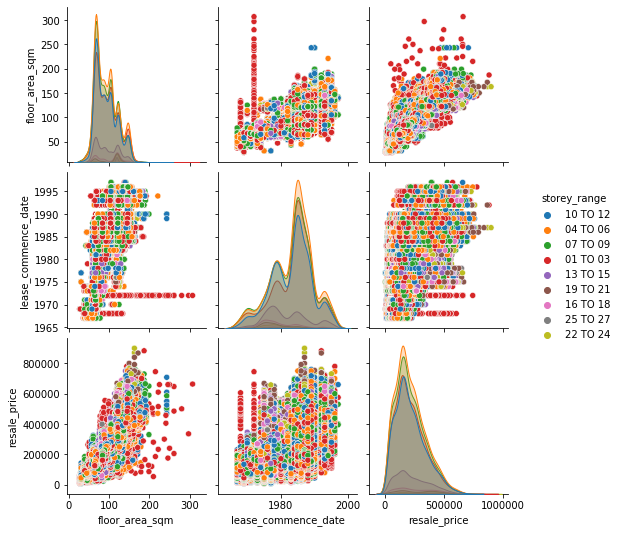

In [273]:
sns.pairplot(dataset,hue='storey_range', diag_kws={'bw': 0.2})
plt.show()

In [274]:
dataset

month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
287195  1999-12      YISHUN  EXECUTIVE   611      YISHUN ST 61     10 TO 12   
287196  1999-12      YISHUN  EXECUTIVE   324       YISHUN CTRL     01 TO 03   
287197  1999-12      YISHUN  EXECUTIVE   392      YISHUN AVE 6     07 TO 09   
287198  1999-12      YISHUN  EXECUTIVE   356    YISHUN RING RD     04 TO 06   
287199  1999-12      YISHUN  EXECUTIVE   358    YISHUN RING RD     01 TO 03   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  
0                 31.0        IMPROVED                 1977          9000  
1                 31.0        IMPROVED                 1977          6000  
2                 31.0        IMPROVED                 1977          8000  
3                 31.0        IMPROVED                 1977          6000  
4                 73.0  NEW GENERATION                 1976         47200  
...                ...             ...                  ...           ...  
287195           142.0       APARTMENT                 1987        456000  
287196           142.0       APARTMENT                 1988        408000  
287197           146.0      MAISONETTE                 1988        469000  
287198           146.0      MAISONETTE                 1988        440000  
287199           145.0      MAISONETTE                 1988        484000  

[287200 rows x 10 columns]

In [275]:
dataset.corr() # Finding Correlation between features:

floor_area_sqm  lease_commence_date  resale_price
floor_area_sqm             1.000000             0.578498      0.797008
lease_commence_date        0.578498             1.000000      0.505054
resale_price               0.797008             0.505054      1.000000

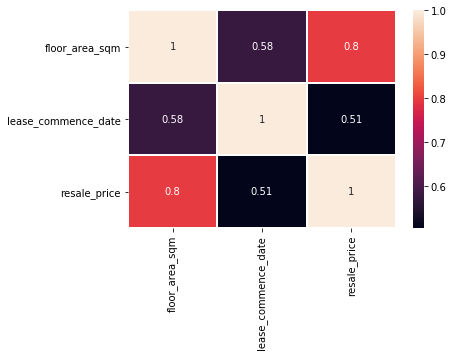

In [276]:
sns.heatmap(dataset.corr(),annot=True,lw=1)

In [277]:
# Correlation is a statistical measure to explain the relationship between two or more than 
# two variables which are used to predict the values of target variable.
# If two variables or features are positively correlated with each other,
# it means when the value of one variable increases then the value of the other variable(s) also increases. 

In [278]:
# resale_price and floor_area_sqm are highly correlated

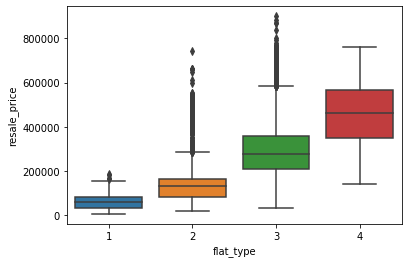

In [279]:
# Box-plots (another way of visualizing and analysing data with min,max,25,50 and 75 percentile values)
sns.boxplot(y='resale_price',x='flat_type',data=dataset1)

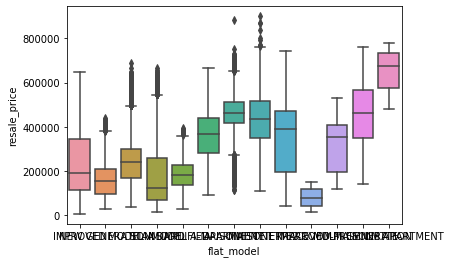

In [280]:
sns.boxplot(y='resale_price',x='flat_model',data=dataset1)

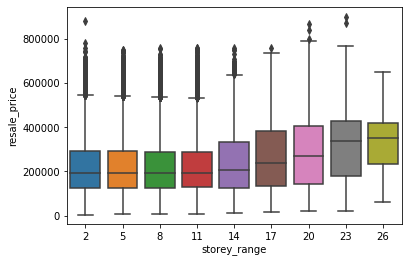

In [281]:
sns.boxplot(y='resale_price',x='storey_range',data=dataset1)

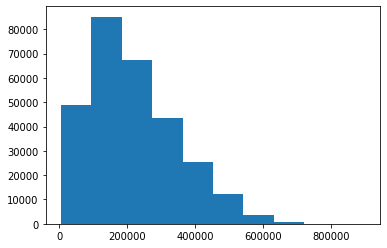

In [282]:
import matplotlib.pyplot as plt
plt.hist(dataset.resale_price)
plt.show()

In [283]:
# flats which have resale prices are between 100000$ and 200000$ have highest count which is 80000
# and then comes those flats which have resale prices 200000$ and 300000$ with 70000 count
# and then flats with resale prices between 0 and 100000$ comes with count ~50000

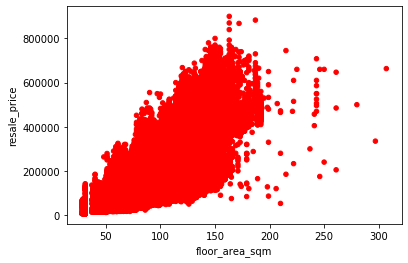

In [284]:
colors = np.where(dataset.resale_price > 1, 'r', 'k')
#plt.scatter(dataset.resale_price, dataset.floor_area_sqm, s=20, c=colors)
# OR (with pandas 0.13 and up)
dataset.plot(kind='scatter', x='floor_area_sqm', y='resale_price', s=20, c=colors)

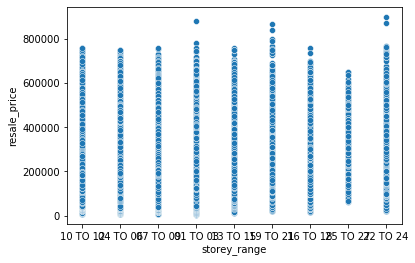

In [285]:
import seaborn as sns
sns.scatterplot(x="storey_range", y="resale_price", data=dataset)

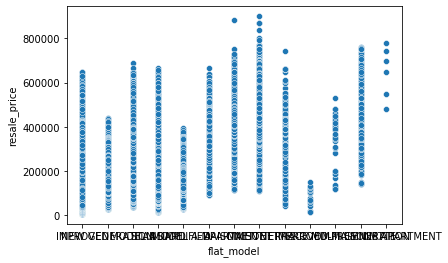

In [286]:
import seaborn as sns
sns.scatterplot(x="flat_model", y="resale_price", data=dataset)

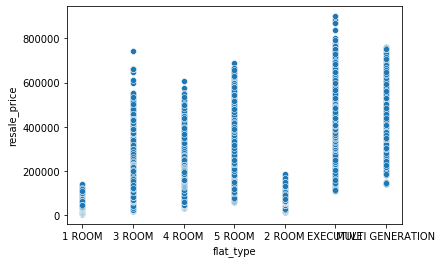

In [287]:
sns.scatterplot(x="flat_type", y="resale_price", data=dataset)

In [288]:
# Based on parameters "floor_area_sqm", "flat_type","flat_model","storey_range" as above, we can see 
# the range of resale flat prices.

### $\text{On Adding latitude and longitude columns based on the address given in dataset}$

In [289]:
# As the record size is 287200 in the given dataset and there is a problem of time out if we use geopy 
# library to convert given address into latitude and longitude. So, just to analyze the data, I am considring
# less record size with 1000 rows.

In [290]:
modified_dataset=dataset=pd.read_csv("/home/ankit/Desktop/resale-flat-prices-based-on-approval-date-1990-1999.csv", nrows = 1000)

In [291]:
modified_dataset.shape

(1000, 10)

In [292]:
dataset["address"] = dataset["town"] + " " + dataset["block"] + " " + dataset["street_name"] 

In [293]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderQuotaExceeded
import time
Address_info= dataset[['town','block','street_name']].copy()
Address_info = Address_info.apply(lambda x: x.str.strip(), axis=1)  
Address_info['Full_Address'] = Address_info[Address_info.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

locator = Nominatim(user_agent="myGeocoder")  
def geocode_me(location):
    time.sleep(1.1)
    try:
        return locator.geocode(location)
    except (GeocoderTimedOut, GeocoderQuotaExceeded) as e:
        if GeocoderQuotaExceeded:
            print(e)
        else:
            print(f'Location not found: {e}')
            return None

Address_info['location'] = Address_info['Full_Address'].apply(lambda x: geocode_me(x)) 
Address_info['point'] = Address_info['location'].apply(lambda loc: tuple(loc.point) if loc else None)
Address_info[['latitude', 'longitude', 'altitude']] =   pd.DataFrame(Address_info['point'].tolist(), index=Address_info.index)

In [294]:
modified_dataset=pd.concat([modified_dataset,Address_info], axis=1)

In [295]:
modified_dataset

month             town flat_type block       street_name storey_range  \
0    1990-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1    1990-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2    1990-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3    1990-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4    1990-01       ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
..       ...              ...       ...   ...               ...          ...   
995  1990-01  KALLANG/WHAMPOA    3 ROOM    11  UPP BOON KENG RD     13 TO 15   
996  1990-01  KALLANG/WHAMPOA    3 ROOM    98        WHAMPOA DR     13 TO 15   
997  1990-01  KALLANG/WHAMPOA    3 ROOM    98        WHAMPOA DR     13 TO 15   
998  1990-01  KALLANG/WHAMPOA    3 ROOM    65     KALLANG BAHRU     07 TO 09   
999  1990-01  KALLANG/WHAMPOA    3 ROOM    65     KALLANG BAHRU     13 TO 15   

     floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0              31.0        IMPROVED                 1977          9000   
1              31.0        IMPROVED                 1977          6000   
2              31.0        IMPROVED                 1977          8000   
3              31.0        IMPROVED                 1977          6000   
4              73.0  NEW GENERATION                 1976         47200   
..              ...             ...                  ...           ...   
995            65.0        IMPROVED                 1974         45000   
996            65.0        IMPROVED                 1974         45700   
997            65.0        IMPROVED                 1974         42000   
998            65.0        IMPROVED                 1981         40000   
999            65.0        IMPROVED                 1981         44500   

                                 address             town block  \
0        ANG MO KIO 309 ANG MO KIO AVE 1       ANG MO KIO   309   
1        ANG MO KIO 309 ANG MO KIO AVE 1       ANG MO KIO   309   
2        ANG MO KIO 309 ANG MO KIO AVE 1       ANG MO KIO   309   
3        ANG MO KIO 309 ANG MO KIO AVE 1       ANG MO KIO   309   
4        ANG MO KIO 216 ANG MO KIO AVE 1       ANG MO KIO   216   
..                                   ...              ...   ...   
995  KALLANG/WHAMPOA 11 UPP BOON KENG RD  KALLANG/WHAMPOA    11   
996        KALLANG/WHAMPOA 98 WHAMPOA DR  KALLANG/WHAMPOA    98   
997        KALLANG/WHAMPOA 98 WHAMPOA DR  KALLANG/WHAMPOA    98   
998     KALLANG/WHAMPOA 65 KALLANG BAHRU  KALLANG/WHAMPOA    65   
999     KALLANG/WHAMPOA 65 KALLANG BAHRU  KALLANG/WHAMPOA    65   

          street_name          Full_Address  \
0    ANG MO KIO AVE 1  309,ANG MO KIO AVE 1   
1    ANG MO KIO AVE 1  309,ANG MO KIO AVE 1   
2    ANG MO KIO AVE 1  309,ANG MO KIO AVE 1   
3    ANG MO KIO AVE 1  309,ANG MO KIO AVE 1   
4    ANG MO KIO AVE 1  216,ANG MO KIO AVE 1   
..                ...                   ...   
995  UPP BOON KENG RD   11,UPP BOON KENG RD   
996        WHAMPOA DR         98,WHAMPOA DR   
997        WHAMPOA DR         98,WHAMPOA DR   
998     KALLANG BAHRU      65,KALLANG BAHRU   
999     KALLANG BAHRU      65,KALLANG BAHRU   

                                              location  \
0    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
1    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
2    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
3    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
4    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
..                                                 ...   
995                                               None   
996  (98, Whampoa Drive, Novena, Singapore, Central...   
997  (98, Whampoa Drive, Novena, Singapore, Central...   
998  (65, Kallang Bahru, Kallang, Singapore, Centra...   
999  (65, Kallang Bahru, Kallang, Singapore, Centra...   

                                     point  latitude   longitude  altitude  
0            

In [296]:
new_dataset=modified_dataset.dropna() #Removing where values are undefined in the form of 'NaN'

In [297]:
new_dataset

month             town flat_type block       street_name storey_range  \
0    1990-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1    1990-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2    1990-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3    1990-01       ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4    1990-01       ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
..       ...              ...       ...   ...               ...          ...   
992  1990-01  KALLANG/WHAMPOA    3 ROOM    82        WHAMPOA DR     13 TO 15   
996  1990-01  KALLANG/WHAMPOA    3 ROOM    98        WHAMPOA DR     13 TO 15   
997  1990-01  KALLANG/WHAMPOA    3 ROOM    98        WHAMPOA DR     13 TO 15   
998  1990-01  KALLANG/WHAMPOA    3 ROOM    65     KALLANG BAHRU     07 TO 09   
999  1990-01  KALLANG/WHAMPOA    3 ROOM    65     KALLANG BAHRU     13 TO 15   

     floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0              31.0        IMPROVED                 1977          9000   
1              31.0        IMPROVED                 1977          6000   
2              31.0        IMPROVED                 1977          8000   
3              31.0        IMPROVED                 1977          6000   
4              73.0  NEW GENERATION                 1976         47200   
..              ...             ...                  ...           ...   
992            66.0        IMPROVED                 1974         39500   
996            65.0        IMPROVED                 1974         45700   
997            65.0        IMPROVED                 1974         42000   
998            65.0        IMPROVED                 1981         40000   
999            65.0        IMPROVED                 1981         44500   

                              address             town block  \
0     ANG MO KIO 309 ANG MO KIO AVE 1       ANG MO KIO   309   
1     ANG MO KIO 309 ANG MO KIO AVE 1       ANG MO KIO   309   
2     ANG MO KIO 309 ANG MO KIO AVE 1       ANG MO KIO   309   
3     ANG MO KIO 309 ANG MO KIO AVE 1       ANG MO KIO   309   
4     ANG MO KIO 216 ANG MO KIO AVE 1       ANG MO KIO   216   
..                                ...              ...   ...   
992     KALLANG/WHAMPOA 82 WHAMPOA DR  KALLANG/WHAMPOA    82   
996     KALLANG/WHAMPOA 98 WHAMPOA DR  KALLANG/WHAMPOA    98   
997     KALLANG/WHAMPOA 98 WHAMPOA DR  KALLANG/WHAMPOA    98   
998  KALLANG/WHAMPOA 65 KALLANG BAHRU  KALLANG/WHAMPOA    65   
999  KALLANG/WHAMPOA 65 KALLANG BAHRU  KALLANG/WHAMPOA    65   

          street_name          Full_Address  \
0    ANG MO KIO AVE 1  309,ANG MO KIO AVE 1   
1    ANG MO KIO AVE 1  309,ANG MO KIO AVE 1   
2    ANG MO KIO AVE 1  309,ANG MO KIO AVE 1   
3    ANG MO KIO AVE 1  309,ANG MO KIO AVE 1   
4    ANG MO KIO AVE 1  216,ANG MO KIO AVE 1   
..                ...                   ...   
992        WHAMPOA DR         82,WHAMPOA DR   
996        WHAMPOA DR         98,WHAMPOA DR   
997        WHAMPOA DR         98,WHAMPOA DR   
998     KALLANG BAHRU      65,KALLANG BAHRU   
999     KALLANG BAHRU      65,KALLANG BAHRU   

                                              location  \
0    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
1    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
2    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
3    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
4    (Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, C...   
..                                                 ...   
992  (82, Whampoa Drive, Novena, Singapore, Central...   
996  (98, Whampoa Drive, Novena, Singapore, Central...   
997  (98, Whampoa Drive, Novena, Singapore, Central...   
998  (65, Kallang Bahru, Kallang, Singapore, Centra...   
999  (65, Kallang Bahru, Kallang, Singapore, Centra...   

                                     point  latitude   longitude  altitude  
0            (1.3645119, 103.8420761, 0.0)  1.364

### $\text{Now, We are going to see the common locations where the flats are placed.}$

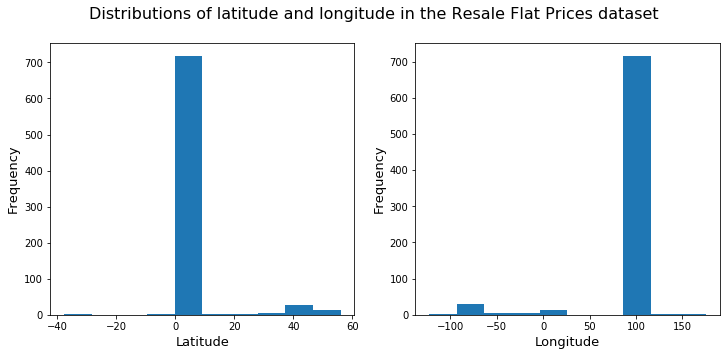

In [298]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distributions of latitude and longitude in the Resale Flat Prices dataset', fontsize=16)
ax1.hist(new_dataset.latitude)
ax1.set_xlabel('Latitude', fontsize=13)
ax1.set_ylabel('Frequency', fontsize=13)
ax2.hist(new_dataset.longitude)
ax2.set_xlabel('Longitude', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13);

In [299]:
# As we can see with latitude range 0 to 10, maximum flats were sold and same for longitude around 100.
# So, these locations might be ideal location for flat sale in future also.

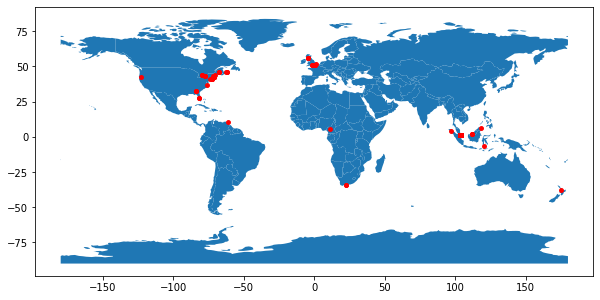

In [300]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(new_dataset['longitude'], new_dataset['latitude'])]
gdf = GeoDataFrame(new_dataset, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [301]:
import geopandas
gdf = geopandas.GeoDataFrame(new_dataset, geometry=geopandas.points_from_xy(new_dataset.longitude, new_dataset.latitude))

In [302]:
print(gdf.head())

     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  ...  \
0            31.0        IMPROVED                 1977          9000  ...   
1            31.0        IMPROVED                 1977          6000  ...   
2            31.0        IMPROVED                 1977          8000  ...   
3            31.0        IMPROVED                 1977          6000  ...   
4            73.0  NEW GENERATION                 1976         47200  ...   

         town block       street_name          Full_Address  \
0  ANG MO KIO   309  ANG MO KIO AVE

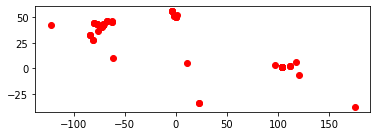

In [303]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Singapore.
ax = world[world.continent == 'Singapore'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

plt.show()

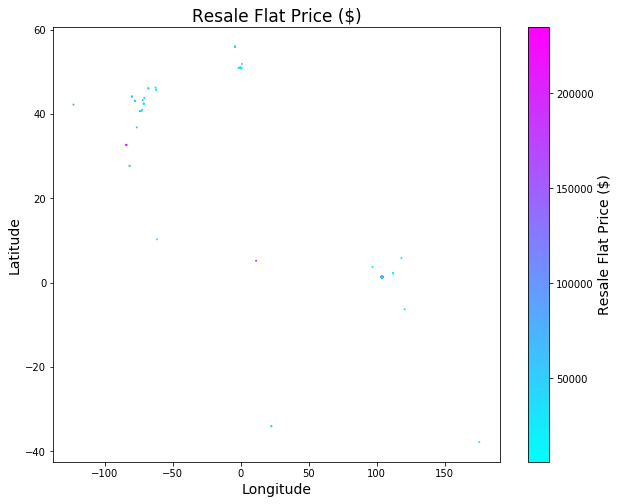

In [304]:
plt.figure(figsize = (10,8))
plt.scatter(new_dataset.longitude, new_dataset.latitude ,c=new_dataset.resale_price, cmap = 'cool', s=1)
plt.colorbar().set_label('Resale Flat Price ($)', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Resale Flat Price ($)', fontsize=17)
plt.show()

In [2]:
# As we can see Locations for which longitude is between -100 to 50 and latitude between 30 to 50,
# Flat prices are below 5000$.

## $\textbf{Building the Model: Predicting the resale flat price}$

In [306]:
## Once we get a good fit, we will use this model to predict the sale price of the flat.

In [307]:
#modified_dataset=pd.concat([modified_dataset,Address_info], axis=1)

In [308]:
#modified_dataset

In [309]:
#array_train_data=train_dataset.to_numpy()

In [310]:
columns_to_remove = (0,1,3,4,7,8)
new_object = [[x for i,x in enumerate(l) if i not in columns_to_remove] for l in data]

In [1]:
#new_object

In [312]:
index_values = [i for i in range(len(data))] 
   
# creating a list of column names 
column_values = ['flat_type','floor_area_sqm', 'number_of_storeys', 'resale_price'] 
  
# creating the dataframe 
df = pd.DataFrame(data = new_object,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
#print(df) 

In [313]:
i = list(df.columns)
a, b = i.index('floor_area_sqm'), i.index('number_of_storeys')
i[b], i[a] = i[a], i[b]
df = df[i]

In [314]:
df = df.rename(columns={'floor_area_sqm': 'number_of_storeys','number_of_storeys': 'floor_area_sqm'})

In [315]:
df

flat_type  floor_area_sqm  number_of_storeys  resale_price
0               1            31.0                 11          9000
1               1            31.0                  5          6000
2               1            31.0                 11          8000
3               1            31.0                  8          6000
4               2            73.0                  5         47200
...           ...             ...                ...           ...
287195          3           142.0                 11        456000
287196          3           142.0                  2        408000
287197          3           146.0                  8        469000
287198          3           146.0                  5        440000
287199          3           145.0                  2        484000

[287200 rows x 4 columns]

# $\textbf{Implementation from scratch:}$

## $\text{Equation of Best Fit Hyperplane: $z^* = (A^TA)^{-1} A^TB$ for system of equations $Az=b$}$ 
## $\text{where vector $b$ is not in plane of column vectors of matrix $A$ and to get the}$ 
## $\text{approximate solution, we have projected the vector $b$ in plane which is $\hat{b}$}$
## $\text{and so solving $Az^* = \hat{b},$ we get $z^* = (A^TA)^{-1} A^TB$}$

In [316]:
dataset=df.to_numpy() #converting dataframe to numpy array

In [317]:
# writing it in z= ax+by+c form and then convert it into matrix form
# I am writing it in matrix equation form directly

A=[]
for i in range(10):
    temp=[]
    temp.append(dataset[i][0])
    temp.append(dataset[i][1])
    temp.append(1) # for coefficient of c i.e. 1
    A.append(temp)

B=[]
for i in range(10):
    B.append(dataset[i][-1])    

In [318]:
# Printing matrix A and vector B
print(A)
print(B) 

[[1.0, 31.0, 1], [1.0, 31.0, 1], [1.0, 31.0, 1], [1.0, 31.0, 1], [2.0, 73.0, 1], [2.0, 67.0, 1], [2.0, 67.0, 1], [2.0, 67.0, 1], [2.0, 67.0, 1], [2.0, 67.0, 1]]
[9000.0, 6000.0, 8000.0, 6000.0, 47200.0, 46000.0, 42000.0, 38000.0, 40000.0, 47000.0]


In [319]:
#writing function for transpose of a matrix
def transpose(A,m,n):
    trans=[]
    for j in range(n):
        temp=[]
        for i in range(m):
            temp.append(A[i][j])
        trans.append(temp)
    return trans    

In [320]:
trans_A= transpose(A,10,3)
print(transpose(A,10,3)) # printing transpose of matrix A

[[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], [31.0, 31.0, 31.0, 31.0, 73.0, 67.0, 67.0, 67.0, 67.0, 67.0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [321]:
mul = np.dot(trans_A, A) # multiplying A^T and A
inv = np.linalg.inv(mul) # inverse of A^T*A
prod= np.dot(inv,trans_A) # multiplying (A^T*A)^-1 and A^T
res = np.dot(prod,B) # finding (A^T*A)^-1 * A^T* B

In [322]:
# So, our result matrix is 
print(res) # It shows the values of a,b,c

[  7750.            766.66666667 -24266.66666667]


In [323]:
### Conclusion : Best fit hyperplane for the given data is z = 7750*x + 766.666*y - 24266.66
#### To estimate the resale_price, I will use this best fit hyperplane  
### ----------------------------------------------------------------------------------------------------------

## $\textbf{Using already implemented Linear Regression}$

In [324]:
#df.dropna()     #drop all rows that have any NaN values

In [325]:
X = df[['flat_type','floor_area_sqm','number_of_storeys']]

In [326]:
X.head()

flat_type  floor_area_sqm  number_of_storeys
0          1            31.0                 11
1          1            31.0                  5
2          1            31.0                 11
3          1            31.0                  8
4          2            73.0                  5

In [327]:
Y = df['resale_price']

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(172320, 3)
(114880, 3)
(172320,)
(114880,)


In [329]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [330]:
# print the intercept
print(model.intercept_)

-139417.47355002948


In [331]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter
#The sign of each coefficient indicates the direction of the relationship
#between a predictor variable and the response variable.
# A positive sign indicates that as the predictor variable increases, the Target variable also increases.
#A negative sign indicates that as the predictor variable increases, the Target variable decreases.

Coefficient
flat_type          1433.563625
floor_area_sqm     3707.883673
number_of_storeys  1293.607392

In [332]:
predictions = model.predict(X_test)
predictions

array([331474.70669051, 327766.82301799,  81439.99850133, ...,
       118345.89672178,  88855.76584638, 316643.17200042])

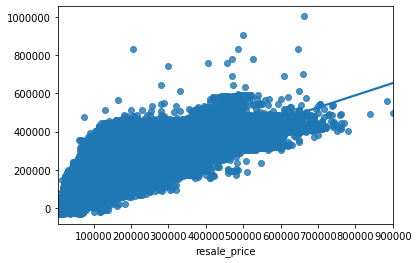

In [333]:
sns.regplot(y_test,predictions)

In [334]:
model.score(X_test,y_test)

0.6378112217247257

In [335]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,learning_rate = 0.1, loss = 'ls')

In [336]:
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6538535149045275

In [337]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 1.006e+05
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        03:22:11   Log-Likelihood:            -2.1841e+06
No. Observations:              172320   AIC:                         4.368e+06
Df Residuals:                  172316   BIC:                         4.368e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.394e+05    979.33

# $\textbf{Conclusion}$

## $\text{Many factors are affecting the resale prices of the flat, like floor_area 
which increases}$<br> $\text{the price of the flat and even location of the flat influencing the prices of the flat.}$